***Sentiment Analysis and Product Recommendation***

Problem Statement:

Ebuss is an e-commerce organization and you are currently employed as Machine Learning engineer with the company. Company has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to *build a model* that will improve the *recommendations given to the users* given their past reviews and ratings.





In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")
import pickle


In [ ]:
reviews=pd.read_csv('/content/gdrive/MyDrive/sample30.csv')

EDA

In [ ]:
reviews.head()


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [ ]:
reviews.shape

(30000, 15)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [ ]:
reviews.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
reviews.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [ ]:
reviews.drop(['reviews_userCity','reviews_userProvince'],axis=1,inplace=True)

In [ ]:
reviews.isnull().sum()

id                         0
brand                      0
categories                 0
manufacturer             141
name                       0
reviews_date              46
reviews_didPurchase    14068
reviews_doRecommend     2570
reviews_rating             0
reviews_text               0
reviews_title            190
reviews_username          63
user_sentiment             1
dtype: int64

In [ ]:
reviews['reviews_didPurchase'].fillna('Null', inplace=True)

In [ ]:
reviews['reviews_doRecommend'].fillna('Null', inplace=True)

In [ ]:
reviews['user_sentiment']=reviews['user_sentiment'].map({'Positive':1,'Negative':0})

In [ ]:
reviews['title_text']=reviews['reviews_title'].fillna('')+" "+reviews["reviews_text"]

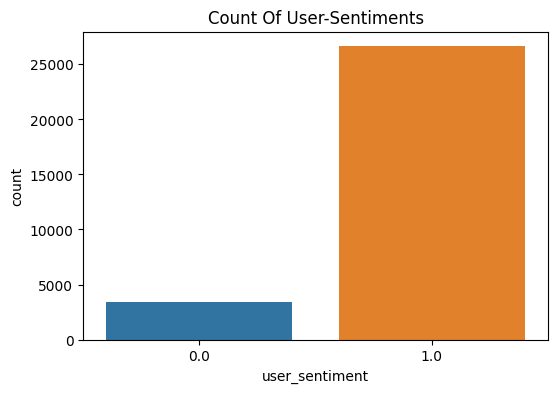

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='user_sentiment', data= reviews)
plt.title("Count Of User-Sentiments")
plt.show()


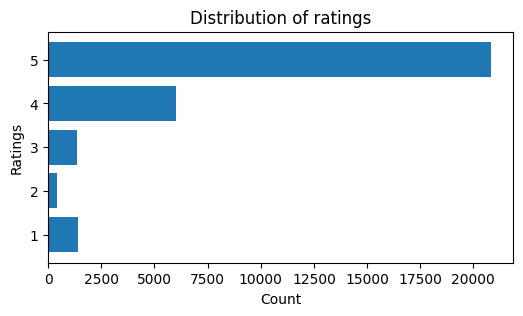

In [ ]:
plt.figure(figsize=[6,3])
x = list(reviews['reviews_rating'].value_counts().index)
y = list(reviews['reviews_rating'].value_counts())
plt.barh(x, y)
plt.title('Distribution of ratings')
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.show()

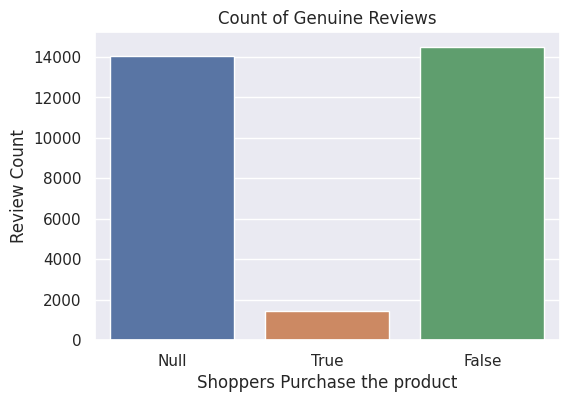

In [ ]:
plt.figure(figsize=(6,4))
sns.set_theme(style="darkgrid")
sns.countplot(x='reviews_didPurchase', data=reviews)
plt.xlabel("Shoppers Purchase the product")
plt.ylabel("Review Count")
plt.title("Count of Genuine Reviews")
plt.show()



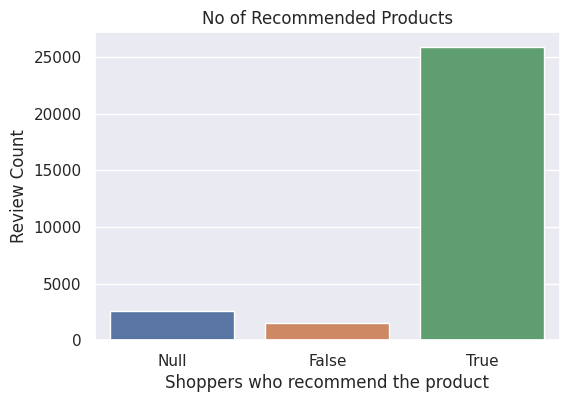

In [ ]:
plt.figure(figsize=(6,4))
sns.set_theme(style="darkgrid")
sns.countplot(x='reviews_doRecommend', data=reviews)
plt.xlabel("Shoppers who recommend the product")
plt.ylabel("Review Count")
plt.title("No of Recommended Products")
plt.show()

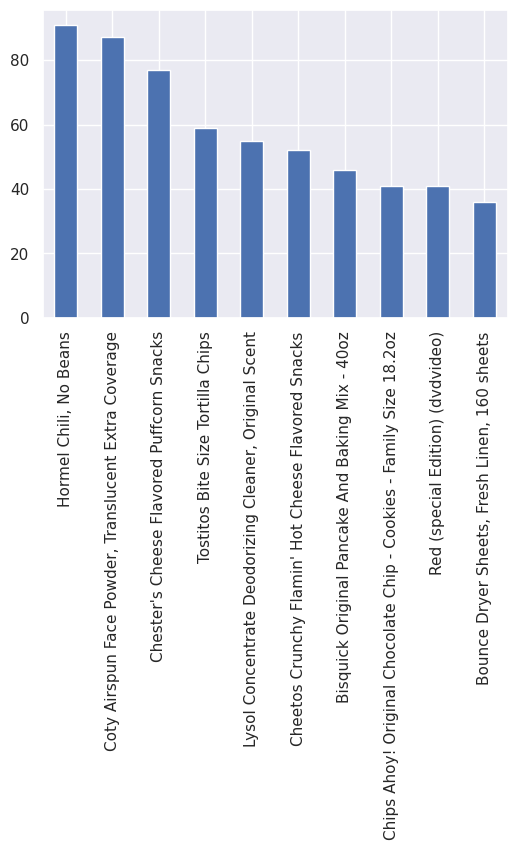

In [ ]:
result = reviews[reviews['reviews_didPurchase'] == True]
plt.figure(figsize=(6,4))
result['name'].value_counts()[0:10].plot(kind = 'bar')
plt.show()


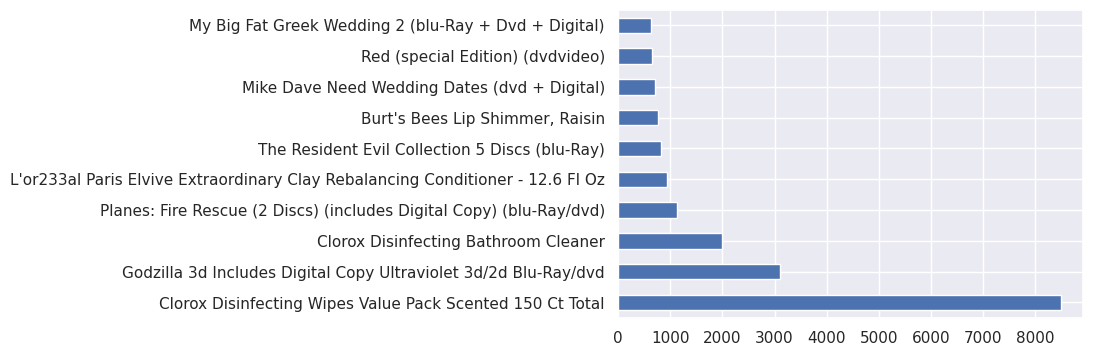

In [ ]:
result = reviews[reviews['reviews_doRecommend'] == True]
plt.figure(figsize=(6,4))
result['name'].value_counts()[0:10].plot(kind = 'barh')
plt.show()

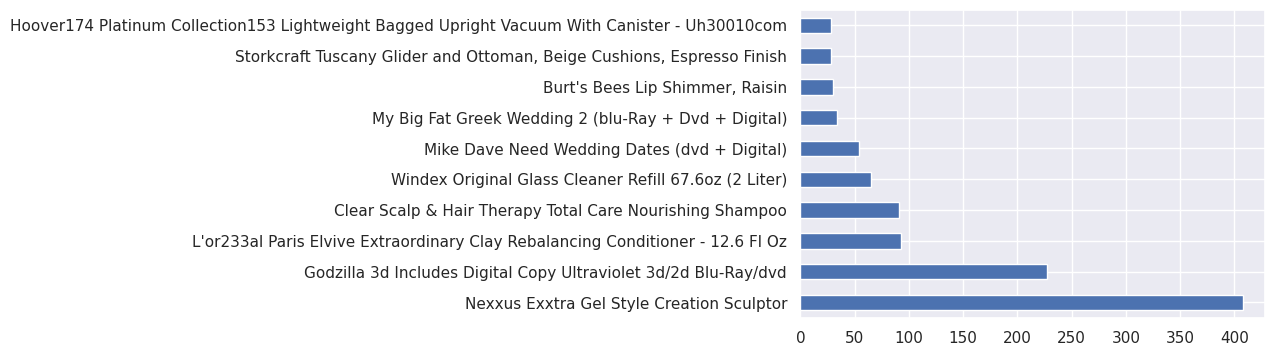

In [ ]:
result = reviews[reviews['reviews_doRecommend'] == False]
plt.figure(figsize=(6,4))
result['name'].value_counts()[0:10].plot(kind = 'barh')
plt.show()

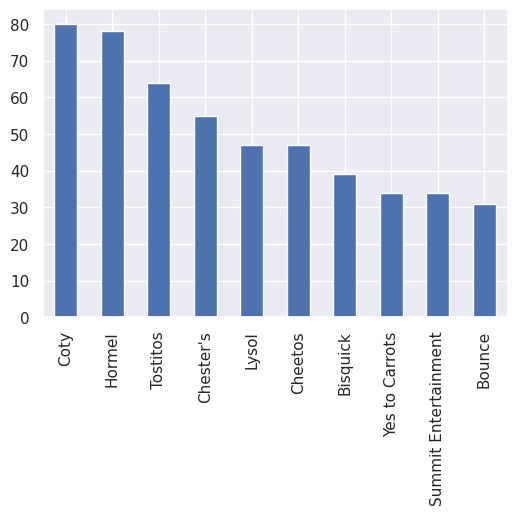

In [ ]:
result = reviews[(reviews['reviews_didPurchase'] == True) & (reviews.user_sentiment==1)]
plt.figure(figsize=(6,4))
result['brand'].value_counts()[0:10].plot(kind = 'bar')
plt.show()

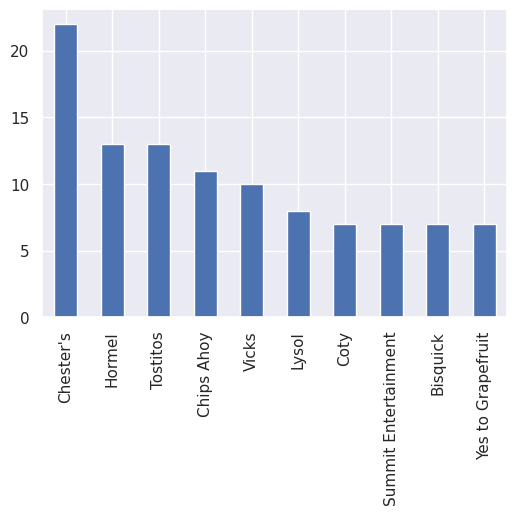

In [ ]:
result = reviews[(reviews['reviews_didPurchase'] == True) & (reviews.user_sentiment==0)]
plt.figure(figsize=(6,4))
result['brand'].value_counts()[0:10].plot(kind = 'bar')
plt.show()

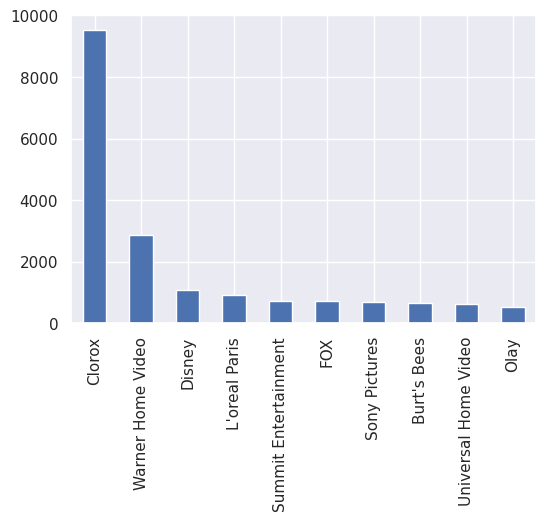

In [ ]:
result = reviews[(reviews['reviews_doRecommend'] == True) & (reviews.user_sentiment==1)]
plt.figure(figsize=(6,4))
result['brand'].value_counts()[0:10].plot(kind = 'bar')
plt.show()

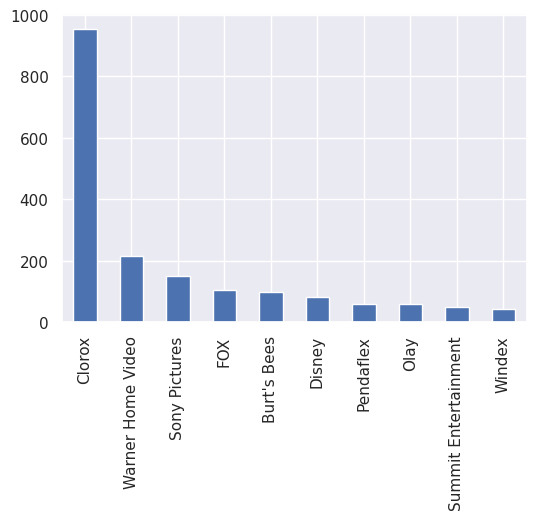

In [ ]:
result = reviews[(reviews['reviews_doRecommend'] == True) & (reviews.user_sentiment==0)]
plt.figure(figsize=(6,4))
result['brand'].value_counts()[0:10].plot(kind = 'bar')
plt.show()

In [ ]:
reviews.isnull().sum()

id                       0
brand                    0
categories               0
manufacturer           141
name                     0
reviews_date            46
reviews_didPurchase      0
reviews_doRecommend      0
reviews_rating           0
reviews_text             0
reviews_title          190
reviews_username        63
user_sentiment           1
title_text               0
dtype: int64

In [ ]:
reviews = reviews[~reviews.user_sentiment.isnull()]

In [ ]:
from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Sentiment Analysis

In [ ]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def clean_text(text):
    # lower text
    text = text.lower()

    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]

    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]

    # join all
    text = " ".join(text)
    return(text)

In [ ]:
reviews['clean']=reviews['title_text'].apply(clean_text)

In [ ]:
reviews['clean']

0        awesome love album good hip hop side current p...
1           good good flavor review collect part promotion
2                                         good good flavor
3        disappoint read review look buy one couple lub...
4        irritation husband buy gel gel caused irritati...
                               ...                        
29995    softness get conditioner influenster try im lo...
29996    love love receive review purpose influenster l...
29997    hair smooth use first love smell product wash ...
29998    perfect oily hair receive influenster never go...
29999    condition healthy receive product complimentar...
Name: clean, Length: 29999, dtype: object

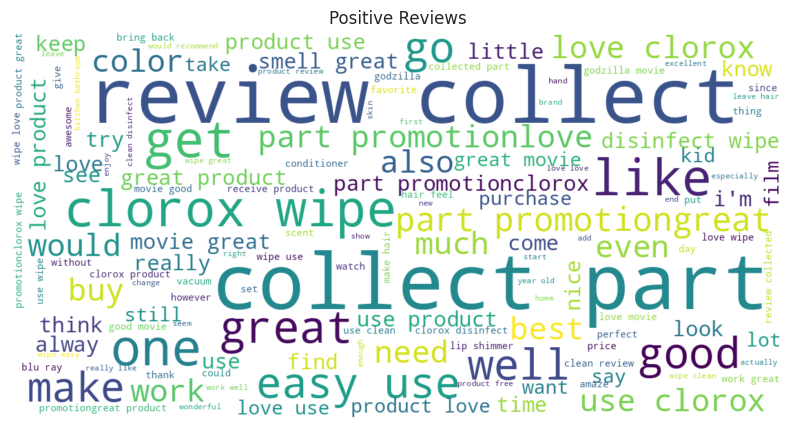

In [ ]:
positive_reviews=reviews.loc[reviews.user_sentiment==1.0,['clean']]
word_cloud_text = ''.join(positive_reviews['clean'])

stop = stopwords.words('english')
wordcloud = WordCloud(background_color='white', stopwords=stop, max_words=300, max_font_size=40,scale=3, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews")
plt.show()

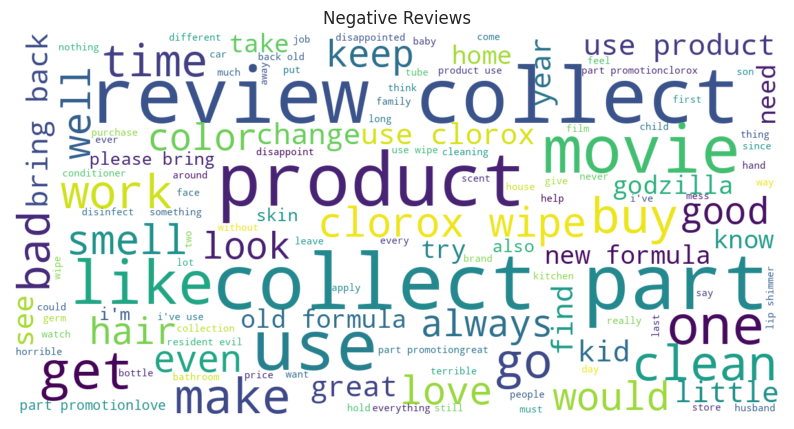

In [ ]:
negative_reviews=reviews.loc[reviews.user_sentiment==0.0,['clean']]
word_cloud_text = ''.join(negative_reviews['clean'])

stop = stopwords.words('english')
wordcloud = WordCloud(background_color='white', stopwords=stop, max_words=300, max_font_size=40,
                     scale=3, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews")
plt.show()

In [ ]:
def get_top_unigram(text, n=30):

    vector = CountVectorizer(stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

top_common_words = get_top_unigram(reviews['clean'].values.astype('U'))
df_unigram = pd.DataFrame(top_common_words, columns = ['unigram' , 'frequency'])
df_unigram.head(10)

,unigram,frequency
0,great,15136
1,use,13643
2,love,13075
3,product,12858
4,movie,10987
5,review,9489
6,promotion,8748
7,clean,8477
8,wipe,8344
9,collect,8297


In [ ]:
def get_top_bigram(text, n=30):

    vector = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

top_common_words = get_top_bigram(reviews['clean'].values.astype('U'))
df_bigram = pd.DataFrame(top_common_words, columns = ['bigram' , 'frequency'])
df_bigram.head(10)

,bigram,frequency
0,review collect,8270
1,collect promotion,8270
2,clorox wipe,2840
3,great product,2046
4,great movie,1787
5,easy use,1615
6,love clorox,1236
7,love product,1196
8,use clorox,1103
9,good movie,1037


In [ ]:
def get_top_trigram(text, n=30):

    vector = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(text)
    bag_of_words = vector.transform(text)
    sum_of_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_of_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    word_freq =sorted(word_freq, key = lambda x: x[1], reverse=True)
    return word_freq[:n]

top_common_words = get_top_trigram(reviews['clean'].values.astype('U'))
df_trigram = pd.DataFrame(top_common_words, columns = ['trigram' , 'frequency'])
df_trigram.head(10)

,trigram,frequency
0,review collect promotion,8270
1,love clorox wipe,609
2,use clorox wipe,558
3,clorox disinfect wipe,550
4,review collected promotion,473
5,clean review collect,440
6,use review collect,360
7,product review collect,347
8,great product love,295
9,receive product free,275


In [ ]:
reviews.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment',
       'title_text', 'clean'],
      dtype='object')

In [ ]:
data_tfidf=reviews[['title_text','clean','reviews_rating','user_sentiment']]

data_tfidf.head(2)

,title_text,clean,reviews_rating,user_sentiment
0,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,5,1.0
1,Good Good flavor. This review was collected as...,good good flavor review collect part promotion,5,1.0


In [ ]:
tfidf=TfidfVectorizer(tokenizer= word_tokenize,stop_words='english')
tfidf.fit(data_tfidf['clean'])
X = tfidf.transform(data_tfidf['clean'])
y = data_tfidf['user_sentiment']


In [ ]:
y.value_counts(normalize=True)*100

1.0    88.776293
0.0    11.223707
Name: user_sentiment, dtype: float64

In [ ]:
pkl_filename = "Tfidf_vectorizer.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickled_tfidf_vectorizer = pickle.load(file)

# New Section

# New Section

In [ ]:
from sklearn.model_selection import train_test_split

Splitting the data in train and test

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20999, 17204)
(9000, 17204)
(20999,)
(9000,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
def get_CR_CM(train_actual,train_predicted,test_actual,test_predicted):
    print('''
         ========================================
           CLASSIFICATION REPORT FOR TRAIN DATA
         ========================================
        ''')
    print(classification_report(train_actual, train_predicted, digits=4))

    print('''
             =============================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
             =============================================
            ''')
    print(classification_report(test_actual, test_predicted, digits=4))

    print('''
             ========================================
               Confusion Matrix FOR TRAIN DATA
             ========================================
            ''')
    print(confusion_matrix(train_actual, train_predicted))

    print('''
             =============================================
               Confusion matrix FOR VALIDATION DATA
             =============================================
            ''')
    print(confusion_matrix(test_actual, test_predicted))


In [ ]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    get_CR_CM(train_actual,train_predicted,test_actual,test_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average='weighted')
    train_precision= precision_score(train_actual,train_predicted,average='weighted')
    train_f1score  = f1_score(train_actual,train_predicted,average='weighted')
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average='weighted')
    test_precision= precision_score(test_actual,test_predicted,average='weighted')
    test_f1score  = f1_score(test_actual,test_predicted,average='weighted')
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

Model Building

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [ ]:
scores= get_metrics(y_train,y_pred_train,y_test,y_pred_test,"LogisticRegression",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

         0.0     0.9175    0.2742    0.4223      2352
         1.0     0.9159    0.9969    0.9547     18647

    accuracy                         0.9159     20999
   macro avg     0.9167    0.6356    0.6885     20999
weighted avg     0.9161    0.9159    0.8950     20999


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

         0.0     0.8432    0.1961    0.3181      1015
         1.0     0.9069    0.9954    0.9491      7985

    accuracy                         0.9052      9000
   macro avg     0.8751    0.5957    0.6336      9000
weighted avg     0.8997    0.9052    0.8779      9000


               Confusion Matrix FOR TRAIN DATA
            
[[  645  1707]
 [   58 18589]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 199  816]
 [  37 7948]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.915948,0.915948,0.916074,0.895044,0.905222,0.905222,0.899711,0.877917


In [ ]:
rf=RandomForestClassifier(random_state=100)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [ ]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

In [ ]:
scores= get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForest",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

         0.0     0.9996    1.0000    0.9998      2352
         1.0     1.0000    0.9999    1.0000     18647

    accuracy                         1.0000     20999
   macro avg     0.9998    1.0000    0.9999     20999
weighted avg     1.0000    1.0000    1.0000     20999


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

         0.0     0.8932    0.1813    0.3014      1015
         1.0     0.9055    0.9972    0.9492      7985

    accuracy                         0.9052      9000
   macro avg     0.8994    0.5893    0.6253      9000
weighted avg     0.9041    0.9052    0.8761      9000


               Confusion Matrix FOR TRAIN DATA
            
[[ 2352     0]
 [    1 18646]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 184  831]
 [  22 7963]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.915948,0.915948,0.916074,0.895044,0.905222,0.905222,0.899711,0.877917
1,RandomForest,0.999952,0.999952,0.999952,0.999952,0.905222,0.905222,0.904117,0.876109


In [ ]:
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_train=gbm.predict(X_train)
y_pred_test=gbm.predict(X_test)

In [ ]:
scores= get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GradientBoosting",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

         0.0     0.8822    0.1497    0.2559      2352
         1.0     0.9029    0.9975    0.9478     18647

    accuracy                         0.9025     20999
   macro avg     0.8926    0.5736    0.6019     20999
weighted avg     0.9006    0.9025    0.8703     20999


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

         0.0     0.7362    0.1182    0.2037      1015
         1.0     0.8987    0.9946    0.9442      7985

    accuracy                         0.8958      9000
   macro avg     0.8175    0.5564    0.5740      9000
weighted avg     0.8804    0.8958    0.8607      9000


               Confusion Matrix FOR TRAIN DATA
            
[[  352  2000]
 [   47 18600]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 120  895]
 [  43 7942]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.915948,0.915948,0.916074,0.895044,0.905222,0.905222,0.899711,0.877917
1,RandomForest,0.999952,0.999952,0.999952,0.999952,0.905222,0.905222,0.904117,0.876109
2,GradientBoosting,0.902519,0.902519,0.900593,0.870343,0.895778,0.895778,0.880392,0.860727


In [ ]:
sm=SMOTE(random_state=100)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
lr1=LogisticRegression()
lr1.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [ ]:
y_pred_train=lr1.predict(X_train_sm)
y_pred_test=lr1.predict(X_test)

In [ ]:
scores= get_metrics(y_train_sm,y_pred_train,y_test,y_pred_test,"LogisticRegressionSMOTE",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

         0.0     0.8912    0.9433    0.9165     18647
         1.0     0.9397    0.8849    0.9115     18647

    accuracy                         0.9141     37294
   macro avg     0.9155    0.9141    0.9140     37294
weighted avg     0.9155    0.9141    0.9140     37294


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

         0.0     0.4101    0.7685    0.5348      1015
         1.0     0.9669    0.8595    0.9100      7985

    accuracy                         0.8492      9000
   macro avg     0.6885    0.8140    0.7224      9000
weighted avg     0.9041    0.8492    0.8677      9000


               Confusion Matrix FOR TRAIN DATA
            
[[17589  1058]
 [ 2147 16500]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 780  235]
 [1122 6863]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.915948,0.915948,0.916074,0.895044,0.905222,0.905222,0.899711,0.877917
1,RandomForest,0.999952,0.999952,0.999952,0.999952,0.905222,0.905222,0.904117,0.876109
2,GradientBoosting,0.902519,0.902519,0.900593,0.870343,0.895778,0.895778,0.880392,0.860727
3,LogisticRegressionSMOTE,0.914061,0.914061,0.915478,0.913988,0.849222,0.849222,0.904098,0.867713


In [ ]:
pkl_filename = "Logistic_Reg_final_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lr1, file)
# Load from file
with open(pkl_filename, 'rb') as file:
    pickled_model = pickle.load(file)

In [ ]:
gbm1=GradientBoostingClassifier()
gbm1.fit(X_train_sm,y_train_sm)

GradientBoostingClassifier()

In [ ]:
y_pred_train=gbm1.predict(X_train_sm)
y_pred_test=gbm1.predict(X_test)

In [ ]:
scores= get_metrics(y_train_sm,y_pred_train,y_test,y_pred_test,"GradientBoostingSMOTE",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

         0.0     0.8229    0.8493    0.8358     18647
         1.0     0.8443    0.8172    0.8305     18647

    accuracy                         0.8332     37294
   macro avg     0.8336    0.8332    0.8332     37294
weighted avg     0.8336    0.8332    0.8332     37294


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

         0.0     0.3204    0.7163    0.4428      1015
         1.0     0.9572    0.8069    0.8756      7985

    accuracy                         0.7967      9000
   macro avg     0.6388    0.7616    0.6592      9000
weighted avg     0.8854    0.7967    0.8268      9000


               Confusion Matrix FOR TRAIN DATA
            
[[15836  2811]
 [ 3409 15238]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 727  288]
 [1542 6443]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.915948,0.915948,0.916074,0.895044,0.905222,0.905222,0.899711,0.877917
1,RandomForest,0.999952,0.999952,0.999952,0.999952,0.905222,0.905222,0.904117,0.876109
2,GradientBoosting,0.902519,0.902519,0.900593,0.870343,0.895778,0.895778,0.880392,0.860727
3,LogisticRegressionSMOTE,0.914061,0.914061,0.915478,0.913988,0.849222,0.849222,0.904098,0.867713
4,GradientBoostingSMOTE,0.833217,0.833217,0.833560,0.833174,0.796667,0.796667,0.885395,0.826825


In [ ]:
param_grid_rf= {
    'max_depth': [10,20,30],
    'min_samples_leaf': [100,125,150,175],
    'min_samples_split': [200,250,300],
    'n_estimators': [250,350,500],
    'max_features': [10,15]
}

In [ ]:
rf2=RandomForestClassifier()
gs_rf=GridSearchCV(rf2,param_grid_rf,cv=3,verbose=1,n_jobs=-1)
gs_rf.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30], 'max_features': [10, 15],
                         'min_samples_leaf': [100, 125, 150, 175],
                         'min_samples_split': [200, 250, 300],
                         'n_estimators': [250, 350, 500]},
             verbose=1)

In [ ]:
gs_rf.best_score_


0.887994665904653

In [ ]:
gs_rf.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 250}

In [ ]:
y_pred_train=gs_rf.predict(X_train)
y_pred_test=gs_rf.predict(X_test)

In [ ]:
scores= get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RFGS",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000      2352
         1.0     0.8880    1.0000    0.9407     18647

    accuracy                         0.8880     20999
   macro avg     0.4440    0.5000    0.4703     20999
weighted avg     0.7885    0.8880    0.8353     20999


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000      1015
         1.0     0.8872    1.0000    0.9402      7985

    accuracy                         0.8872      9000
   macro avg     0.4436    0.5000    0.4701      9000
weighted avg     0.7872    0.8872    0.8342      9000


               Confusion Matrix FOR TRAIN DATA
            
[[    0  2352]
 [    0 18647]]

               Confusion matrix FOR VALIDATION DATA
            
[[   0 1015]
 [   0 7985]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.915948,0.915948,0.916074,0.895044,0.905222,0.905222,0.899711,0.877917
1,RandomForest,0.999952,0.999952,0.999952,0.999952,0.905222,0.905222,0.904117,0.876109
2,GradientBoosting,0.902519,0.902519,0.900593,0.870343,0.895778,0.895778,0.880392,0.860727
3,LogisticRegressionSMOTE,0.914061,0.914061,0.915478,0.913988,0.849222,0.849222,0.904098,0.867713
4,GradientBoostingSMOTE,0.833217,0.833217,0.833560,0.833174,0.796667,0.796667,0.885395,0.826825
5,RFGS,0.887995,0.887995,0.788535,0.835314,0.887222,0.887222,0.787163,0.834203


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb1 = XGBClassifier()
xgb1.fit(X_train_sm,y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_train=xgb1.predict(X_train_sm)
y_pred_test=xgb1.predict(X_test)

In [ ]:
scores= get_metrics(y_train_sm,y_pred_train,y_test,y_pred_test,"XGBSMOTE",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

         0.0     0.9392    0.9437    0.9414     18647
         1.0     0.9435    0.9389    0.9412     18647

    accuracy                         0.9413     37294
   macro avg     0.9413    0.9413    0.9413     37294
weighted avg     0.9413    0.9413    0.9413     37294


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

         0.0     0.4672    0.5901    0.5215      1015
         1.0     0.9461    0.9145    0.9300      7985

    accuracy                         0.8779      9000
   macro avg     0.7067    0.7523    0.7258      9000
weighted avg     0.8921    0.8779    0.8839      9000


               Confusion Matrix FOR TRAIN DATA
            
[[17598  1049]
 [ 1140 17507]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 599  416]
 [ 683 7302]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.915948,0.915948,0.916074,0.895044,0.905222,0.905222,0.899711,0.877917
1,RandomForest,0.999952,0.999952,0.999952,0.999952,0.905222,0.905222,0.904117,0.876109
2,GradientBoosting,0.902519,0.902519,0.900593,0.870343,0.895778,0.895778,0.880392,0.860727
3,LogisticRegressionSMOTE,0.914061,0.914061,0.915478,0.913988,0.849222,0.849222,0.904098,0.867713
4,GradientBoostingSMOTE,0.833217,0.833217,0.833560,0.833174,0.796667,0.796667,0.885395,0.826825
5,RFGS,0.887995,0.887995,0.788535,0.835314,0.887222,0.887222,0.787163,0.834203
6,XGBSMOTE,0.941304,0.941304,0.941315,0.941304,0.877889,0.877889,0.892095,0.883948


In [ ]:
reviews.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment',
       'title_text', 'clean'],
      dtype='object')

In [ ]:
recommendation=reviews[['id','name','reviews_rating','reviews_username']]

Building a Recommendation System

In [ ]:
recommendation.head()

,id,name,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557


In [ ]:
recommendation.isnull().sum()

id                   0
name                 0
reviews_rating       0
reviews_username    63
dtype: int64

In [ ]:
recommendation = recommendation[~recommendation.reviews_username.isnull()]

In [ ]:
recommendation.shape

(29936, 4)

In [ ]:
len(recommendation['name'].unique())

271

In [ ]:
train,test=train_test_split(recommendation,test_size=0.30,random_state=100)

In [ ]:
print(train.shape)
print(test.shape)

(20955, 4)
(8981, 4)


In [ ]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)
print(df_pivot.shape)
df_pivot.head(5)

(18252, 246)


id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dummy_train = train.copy()

In [ ]:
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [ ]:
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.9486833 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.        0.9486833 0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [ ]:
user_correlation.shape

(18252, 18252)

In [ ]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.       , 0.9486833, 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

In [ ]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.9877296 , ..., 0.        , 0.50493317,
        0.66421116],
       [0.        , 0.        , 0.9701425 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.70014004],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135]])

In [ ]:
user_predicted_ratings.shape

(18252, 246)

In [ ]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
00sab00,0.0,0.0,0.987730,4.506226,0.0,0.0,2.491874,0.00000,0.409769,0.0,...,0.0,0.000000,0.414513,0.0,0.0,2.950062,1.158578,0.0,0.504933,0.664211
01impala,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.27552,0.000000,0.0,...,0.0,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.27552,0.000000,0.0,...,0.0,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000
02deuce,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.27552,0.000000,0.0,...,0.0,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000


In [ ]:
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name02deuce
02deuce


In [ ]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpfRTh1ilAPnD_xYic2    116.348908
AVpe41TqilAPnD_xQH3d    110.312596
AVpf0eb2LJeJML43EVSt     96.302831
AVpf2tw1ilAPnD_xjflC     79.158120
AVpe59io1cnluZ0-ZgDU     58.035377
Name: 02deuce, dtype: float64

In [ ]:
mapping=recommendation[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
mapping.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [ ]:
d = pd.merge(d,mapping, left_on='id', right_on='id', how = 'left')
d

,id,02deuce,name
0,AVpfRTh1ilAPnD_xYic2,116.348908,Planes: Fire Rescue (2 Discs) (includes Digita...
1,AVpe41TqilAPnD_xQH3d,110.312596,Mike Dave Need Wedding Dates (dvd + Digital)
2,AVpf0eb2LJeJML43EVSt,96.302831,The Resident Evil Collection 5 Discs (blu-Ray)
3,AVpf2tw1ilAPnD_xjflC,79.158120,Red (special Edition) (dvdvideo)
4,AVpe59io1cnluZ0-ZgDU,58.035377,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...


In [ ]:
common = test[test.reviews_username.isin(train.reviews_username)]

In [ ]:
common.shape

(2055, 4)

In [ ]:
common_user_based_matrix = common.pivot_table(index='reviews_username',columns='id',values='reviews_rating')
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234asdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corr_df = pd.DataFrame(user_correlation)

In [ ]:
corr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18242,18243,18244,18245,18246,18247,18248,18249,18250,18251
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,...,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.948683,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
corr_df['reviews_username'] = df_pivot.index

corr_df.set_index('reviews_username',inplace=True)
corr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18242,18243,18244,18245,18246,18247,18248,18249,18250,18251
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,...,0.0,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.948683,0.0
01impala,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
02dakota,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
02deuce,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
list_name = common.reviews_username.tolist()

corr_df.columns = df_pivot.index.tolist()

corr_df_1 =  corr_df[corr_df.index.isin(list_name)]

In [ ]:
corr_df_1.shape

(1737, 18252)

In [ ]:
corr_df_2 = corr_df_1.T[corr_df_1.T.index.isin(list_name)]

In [ ]:
corr_df_3 = corr_df_2.T

In [ ]:
print(corr_df_3.shape)
corr_df_3.head(10)

(1737, 1737)


,1234,1234567,1234asdf,123charlie,1witch,37f5p,a hutch,aac06002,aalyah,aaron,...,ygtz,yohnie1,yucky111,yummy,zach,zapman,zburt5,zebras,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.000000,0.529813,0.0,0.662266,0.0,0.0,0.0,0.0,0.0,0.468293,...,0.529813,0.374634,0.0,0.0,0.0,0.0,0.0,0.529813,0.529813,0.0
1234567,0.529813,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.000000,0.707107,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0
1234asdf,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
123charlie,0.662266,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.707107,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1witch,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
37f5p,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
a hutch,0.000000,0.000000,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
aac06002,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
aalyah,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,...,0.000000,0.707107,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [ ]:
corr_df_3[corr_df_3<0]=0

common_user_predicted_ratings = np.dot(corr_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[3.36851113, 5.04922514, 0.        , ..., 0.        , 0.66226618,
        0.        ],
       [0.43193421, 1.88982237, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43193421, 1.88982237, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [5.92599112, 5.28482372, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 6.8844459 , 0.        , ..., 2.88675135, 0.        ,
        0.        ]])

In [ ]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username',columns='id',values='reviews_rating').fillna(0)
print(dummy_test.shape)

(1737, 120)


In [ ]:
dummy_test.head(10)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234asdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a hutch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aac06002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aalyah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head(5)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfnRuSilAPnD_xfB8l,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234asdf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
common_ = common.pivot_table(index='reviews_username',columns='id',values='reviews_rating')

In [ ]:
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.139779871609101


In [ ]:
df_pivot = train.pivot_table(index='reviews_username',columns='id',values='reviews_rating').T

df_pivot.head(10)

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,08dallas,09mommy11,1.11E+24,1085,...,zowie,zozo0o,zpalma,zsarah,zt313,zwithanx,zxcsdfd,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmBrdGV-KLJ3adewb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YmDL9vKc47QAVgr7_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1Ymf_rglJLPUi8II2v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1Yn94nvKc47QAVgtst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
item_correlation.shape

(246, 246)

In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01550236, ..., 0.        , 0.02002406,
        0.01053979],
       [0.        , 0.        , 0.00435222, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02339881],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01756631],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01871904]])

In [ ]:
print(item_predicted_ratings.shape)
print(dummy_train.shape)

(18252, 246)
(18252, 246)


In [ ]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
00sab00,0.0,0.0,0.015502,0.022834,0.0,0.0,0.026688,0.000000,0.008040,0.0,...,0.000000,0.000000,0.041015,0.0,0.0,0.092523,0.006838,0.0,0.020024,0.010540
01impala,0.0,0.0,0.004352,0.038497,0.0,0.0,0.000000,0.012400,0.000000,0.0,...,0.000000,0.023557,0.066570,0.0,0.0,0.000000,0.008549,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.007254,0.064162,0.0,0.0,0.000000,0.020666,0.000000,0.0,...,0.000000,0.039262,0.110951,0.0,0.0,0.000000,0.014248,0.0,0.000000,0.000000
02deuce,0.0,0.0,0.005803,0.051330,0.0,0.0,0.000000,0.016533,0.000000,0.0,...,0.000000,0.031409,0.088761,0.0,0.0,0.000000,0.011398,0.0,0.000000,0.000000
0325home,0.0,0.0,0.000000,0.022309,0.0,0.0,0.017775,0.014881,0.000000,0.0,...,0.021183,0.000000,0.000000,0.0,0.0,0.055621,0.005760,0.0,0.000000,0.023399
08dallas,0.0,0.0,0.000000,0.012666,0.0,0.0,0.000000,0.000000,0.114826,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
09mommy11,0.0,0.0,0.000000,0.021332,0.0,0.0,0.019829,0.004781,0.029009,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.046985
1.11E+24,0.0,0.0,0.000000,0.022309,0.0,0.0,0.017775,0.014881,0.000000,0.0,...,0.021183,0.000000,0.000000,0.0,0.0,0.055621,0.005760,0.0,0.000000,0.023399


In [ ]:
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name02deuce
02deuce


In [ ]:
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpe41TqilAPnD_xQH3d    0.175166
AVpfRTh1ilAPnD_xYic2    0.140281
AVpf0eb2LJeJML43EVSt    0.127090
AVpf2tw1ilAPnD_xjflC    0.120327
AVpe59io1cnluZ0-ZgDU    0.097660
Name: 02deuce, dtype: float64

In [ ]:
mapping= recommendation[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
mapping.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [ ]:
d = pd.merge(d,mapping, left_on='id', right_on='id', how = 'left')
d

,id,02deuce,name
0,AVpe41TqilAPnD_xQH3d,0.175166,Mike Dave Need Wedding Dates (dvd + Digital)
1,AVpfRTh1ilAPnD_xYic2,0.140281,Planes: Fire Rescue (2 Discs) (includes Digita...
2,AVpf0eb2LJeJML43EVSt,0.127090,The Resident Evil Collection 5 Discs (blu-Ray)
3,AVpf2tw1ilAPnD_xjflC,0.120327,Red (special Edition) (dvdvideo)
4,AVpe59io1cnluZ0-ZgDU,0.097660,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...


In [ ]:
common = test[test.id.isin(train.id	)]
print(common.shape)

(8948, 4)


In [ ]:
common.head(10)

,id,name,reviews_rating,reviews_username
2434,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),5,braali90
24599,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,shonzie
11496,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,abby8992
5337,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),5,shygal88
5175,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),5,tapley
23260,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,3,mscilla
9192,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,ojoe61
14633,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,wonderdrug
28457,AVpftikC1cnluZ0-p31V,"Storkcraft Tuscany Glider and Ottoman, Beige C...",1,ashtonsmommy2009
25011,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,vulture


In [ ]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T


In [ ]:
common_item_based_matrix.shape

(199, 8367)

In [ ]:
item_corr_df = pd.DataFrame(item_correlation)

In [ ]:
item_corr_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.003311,0.0,0.0,...,0.0,0.0,0.076875,0.0,0.0,0.0,0.006408,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.003311,0.0,0.0,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
item_corr_df['id'] = df_pivot.index
item_corr_df.set_index('id',inplace=True)
item_corr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.003311,0.0,0.0,...,0.0,0.0,0.076875,0.0,0.0,0.0,0.006408,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
list_name = common.id.tolist()
item_corr_df.columns = df_pivot.index.tolist()
item_corr_df_1 =  item_corr_df[item_corr_df.index.isin(list_name)]

In [ ]:
item_corr_df_2 = item_corr_df_1.T[item_corr_df_1.T.index.isin(list_name)]

In [ ]:
item_corr_df_3 = item_corr_df_2.T

In [ ]:
item_corr_df_3.head(10)

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.000000,0.0,0.0,0.0,0.003311,0.0,0.0,0.016665,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.076875,0.0,0.006408,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
AV1Ymf_rglJLPUi8II2v,0.0,0.003311,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
AV1Yn94nvKc47QAVgtst,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
AV1Ynb3bglJLPUi8IJxJ,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
AV1YneDPglJLPUi8IJyQ,0.0,0.016665,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [ ]:
item_corr_df_3[item_corr_df_3<0]=0

In [ ]:
common_item_predicted_ratings = np.dot(item_corr_df_3, common_item_based_matrix.fillna(0))

In [ ]:
print(common_item_predicted_ratings.shape)

(199, 8367)


In [ ]:
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02230942, 0.        , 0.02784899, ..., 0.06986326, 0.06986326,
        0.00892377],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05562108, 0.        , 0.        , ..., 0.        , 0.        ,
        0.02224843],
       [0.00575959, 0.        , 0.03019687, ..., 0.        , 0.        ,
        0.00230383],
       [0.02339881, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00935952]])

In [ ]:
dummy_test = common.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [ ]:
X  = common_item_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
total_non_nan = np.count_nonzero(~np.isnan(y))

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5671350690444594


In [ ]:
user_final_rating.to_pickle("user_final_rating.pkl")
pickled_user_final_rating = pd.read_pickle("user_final_rating.pkl")
pickled_user_final_rating

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
00sab00,0.0,0.0,0.987730,4.506226,0.0,0.0,2.491874,0.000000,0.409769,0.0,...,0.000000,0.000000,0.414513,0.0,0.0,2.950062,1.158578,0.0,0.504933,0.664211
01impala,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.275520,0.000000,0.0,...,0.000000,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000
02dakota,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.275520,0.000000,0.0,...,0.000000,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000
02deuce,0.0,0.0,0.970143,17.622499,0.0,0.0,0.000000,2.275520,0.000000,0.0,...,0.000000,1.555428,1.515618,0.0,0.0,0.000000,2.986206,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwithanx,0.0,0.0,0.000000,11.892712,0.0,0.0,6.010227,3.466876,0.000000,0.0,...,3.535534,0.000000,0.000000,0.0,0.0,4.332638,3.535534,0.0,0.000000,2.886751
zxcsdfd,0.0,0.0,0.000000,11.892712,0.0,0.0,6.010227,3.466876,0.000000,0.0,...,3.535534,0.000000,0.000000,0.0,0.0,4.332638,3.535534,0.0,0.000000,2.886751
zyiah4,0.0,0.0,0.000000,11.892712,0.0,0.0,6.010227,3.466876,0.000000,0.0,...,3.535534,0.000000,0.000000,0.0,0.0,4.332638,3.535534,0.0,0.000000,2.886751


In [ ]:
mapping.to_pickle("prod_id_name_mapping.pkl")
pickled_mapping = pd.read_pickle("prod_id_name_mapping.pkl")
pickled_mapping

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar
...,...,...
28769,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter ...
28772,AVpfvieo1cnluZ0-qdnu,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...
28795,AVpfVMhR1cnluZ0-ixY8,2017-2018 Brownline174 Duraflex 14-Month Plann...
28799,AVpfVPh3ilAPnD_xZzW9,Mrs. Meyer's Lemon Verbena Surface Scrub


In [ ]:
reviews.to_pickle("reviews_data_all_cols.pkl")
pickled_reviews_data = pd.read_pickle("reviews_data_all_cols.pkl")
pickled_reviews_data

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,title_text,clean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,Null,Null,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1.0,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,Null,5,Good flavor. This review was collected as part...,Good,dorothy w,1.0,Good Good flavor. This review was collected as...,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,Null,5,Good flavor.,Good,dorothy w,1.0,Good Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,0.0,Disappointed I read through the reviews on her...,disappoint read review look buy one couple lub...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,0.0,Irritation My husband bought this gel for us. ...,irritation husband buy gel gel caused irritati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,laurasnchz,1.0,Softness!! I got this conditioner with Influen...,softness get conditioner influenster try im lo...
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,scarlepadilla,1.0,"I love it I love it , I received this for revi...",love love receive review purpose influenster l...
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,liviasuexo,1.0,Hair is so smooth after use First of all I lov...,hair smooth use first love smell product wash ...
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,ktreed95,1.0,Perfect for my oily hair! I received this thro...,perfect oily hair receive influenster never go...


Improving the recommendations using the sentiment analysis


In [ ]:
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name02deuce
02deuce


In [ ]:
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
mapping= recommendation[['id','name']]
mapping = pd.DataFrame.drop_duplicates(mapping)
recommendations = pd.merge(recommendations,mapping, left_on='id', right_on='id', how = 'left')
recommendations

,id,02deuce,name
0,AVpfRTh1ilAPnD_xYic2,116.348908,Planes: Fire Rescue (2 Discs) (includes Digita...
1,AVpe41TqilAPnD_xQH3d,110.312596,Mike Dave Need Wedding Dates (dvd + Digital)
2,AVpf0eb2LJeJML43EVSt,96.302831,The Resident Evil Collection 5 Discs (blu-Ray)
3,AVpf2tw1ilAPnD_xjflC,79.158120,Red (special Edition) (dvdvideo)
4,AVpe59io1cnluZ0-ZgDU,58.035377,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
5,AVpf3VOfilAPnD_xjpun,45.943261,Clorox Disinfecting Wipes Value Pack Scented 1...
6,AVpfD9xTLJeJML431ig2,21.963964,There's Something About Mary (dvd)
7,AVpfJP1C1cnluZ0-e3Xy,19.933784,Clorox Disinfecting Bathroom Cleaner
8,AVpf0thK1cnluZ0-r8vR,18.720748,100:Complete First Season (blu-Ray)
9,AVpf5olc1cnluZ0-tPrO,18.302784,Chester's Cheese Flavored Puffcorn Snacks


In [ ]:
# Predicting sentiment for the recommended products using the Logistic Regression model developed earlier

improved_recommendations= pd.merge(recommendations,pickled_reviews_data[['id','clean']], left_on='id', right_on='id', how = 'left')
test_data_for_user = pickled_tfidf_vectorizer.transform(improved_recommendations['clean'])
sentiment_prediction_for_user= pickled_model.predict(test_data_for_user)
sentiment_prediction_for_user = pd.DataFrame(sentiment_prediction_for_user, columns=['Predicted_Sentiment'])
improved_recommendations= pd.concat([improved_recommendations, sentiment_prediction_for_user], axis=1)

In [ ]:
# For each of the 20 recommended products, calculating the percentage of positive sentiments
#   for all the reviews of each product

a=improved_recommendations.groupby('id')
b=pd.DataFrame(a['Predicted_Sentiment'].count()).reset_index()
b.columns = ['id', 'Total_reviews']
c=pd.DataFrame(a['Predicted_Sentiment'].sum()).reset_index()
c.columns = ['id', 'Total_predicted_positive_reviews']
improved_recommendations_final=pd.merge( b, c, left_on='id', right_on='id', how='left')
improved_recommendations_final['Positive_sentiment_rate'] = improved_recommendations_final['Total_predicted_positive_reviews'].div(improved_recommendations_final['Total_reviews']).replace(np.inf, 0)
improved_recommendations_final= improved_recommendations_final.sort_values(by=['Positive_sentiment_rate'], ascending=False )
improved_recommendations_final=pd.merge(improved_recommendations_final, pickled_mapping, left_on='id', right_on='id', how='left')

# Filtering out the top 5 products with the highest percentage of positive review
improved_recommendations_final.head(5)

,id,Total_reviews,Total_predicted_positive_reviews,Positive_sentiment_rate,name
0,AVpf2tw1ilAPnD_xjflC,672,613.0,0.912202,Red (special Edition) (dvdvideo)
1,AVpfPnrU1cnluZ0-g9rL,186,169.0,0.908602,Stargate (ws) (ultimate Edition) (director's C...
2,AVpe59io1cnluZ0-ZgDU,668,602.0,0.901198,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
3,AVpf4oLxLJeJML43FcxC,313,282.0,0.900958,Avery174 Ready Index Contemporary Table Of Con...
4,AVpf0thK1cnluZ0-r8vR,139,125.0,0.899281,100:Complete First Season (blu-Ray)


While deploying the app using Flask I have used venv to download the libraries to deploy them.
An end-to-end web application is deployed using Flask and Heroku using class imbalance handled Logistic Regression model and User based recommendation system at given URL- https://sentimentalysisr-045f80d49181.herokuapp.com/

The app takes the username as input and upon pressing the submit button it recommends the top 5 products based on the username entered

The GitHub link for all the files is :https://github.com/nehakhanuja/SentimentAnalysis/main/
